# U.S. Medical Insurance Costs

1. Observation of insurance.csv and preparing data for manupulation. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing insurance.csv 
insurance = pd.read_csv('insurance.csv')

# Observation of first 5 rows
print(insurance.head())

# Checking data types
print(insurance.dtypes)

# Changing some variables from 'object' to 'string'
insurance[['sex', 'smoker', 'region']] = insurance[['sex', 'smoker', 'region']].convert_dtypes(str)

# Checking, if data have any NaN variables
null_counts = insurance.isnull().sum()
total_counts = insurance.count()

nan_proportions = (null_counts / total_counts)

print('NaN proportions: ')
print(nan_proportions) # There isn't any NaN values in data frame

# Checking, if 'region' have more than two types of answer
unique_region = insurance['region'].unique()
print(unique_region) # We have 4 diff types of answer - 'southwest', 'southeast', 'northwest', 'northeast'

# Checking, if 'bmi' & 'charges' have 0 values
contains_zero = (insurance == 0).any() 
print(contains_zero) # We can see that there is no zero values in those instances.

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
NaN proportions: 
age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64
<StringArray>
['southwest', 'southeast', 'northwest', 'northeast']
Length: 4, dtype: string
age         False
sex         False
bmi         False
children     True
smoker      False
region      False
charges     False
dtype: bool


2. Scoping insurance data, to have overall understanding of the existing information.

In [2]:
# Checking the average age of the people, that get insured 
average_insured_age = round(insurance['age'].mean())
print(f'The average age is: {average_insured_age}\n')

# Analyzing from which region the majority is coming from
group_by_region = insurance['region'].value_counts()
print(f'Sorted people by: \n{group_by_region}\n') # We can see that the majority is coming from South East region

# Checking the different cost between average smoking & non-smoking person
# Separating data frame into two sub-groups
total_smokers = insurance[insurance['smoker'] == 'yes']
average_smoker_insurance_cost = round(total_smokers['charges'].mean(), 2)
print(f'Average insurance cost for a smoker: {average_smoker_insurance_cost}')

total_non_smokers = insurance[insurance['smoker'] == 'no']
average_non_smoker_insurance_cost = round(total_non_smokers['charges'].mean(), 2)
print(f'Average insurance cost for a non-smoker: {average_non_smoker_insurance_cost}')

difference_between_insurance_cost = abs(average_smoker_insurance_cost - average_non_smoker_insurance_cost)
print(f'Difference in insurance cost between smokers & non-smokers: {difference_between_insurance_cost}\n') # We can see that charges for average smoker is way bigger, than non-smoker with 23615.96 USD

# Checking the proportion of female & male
gender_proportions = insurance['sex'].value_counts(normalize=True) 
print(f'Gender proportions: \n{gender_proportions}') # From the calculation, we can see that men are slightly more, than women, by 1.1%

The average age is: 39

Sorted people by: 
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: Int64

Average insurance cost for a smoker: 32050.23
Average insurance cost for a non-smoker: 8434.27
Difference in insurance cost between smokers & non-smokers: 23615.96

Gender proportions: 
sex
male      0.505232
female    0.494768
Name: proportion, dtype: Float64


3. Creating full analysis methods: Average medical charges by Age Group


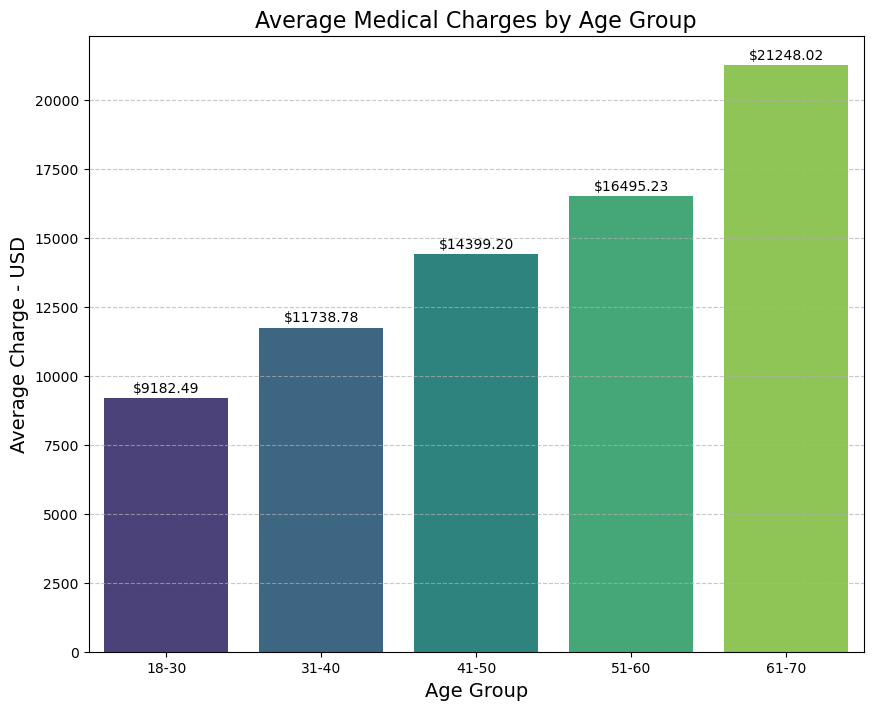

In [3]:
# Creating age bins
age_bins = [18, 30, 40, 50, 60, 70]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-70']

# Adding a new column 'age_group' to the DataFrame based on the bins
insurance['age_group'] = pd.cut(insurance['age'], bins=age_bins, labels=age_labels, right=False)

# Grouping people by age group
group_by_age = insurance.groupby('age_group')['charges'].mean().reset_index() 

# Visualisation of the data
age_avg_charges = plt.figure(figsize=(10, 8))
sns.barplot(x='age_group', y='charges', data=group_by_age, palette='viridis')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding data labels
for i, value in enumerate(group_by_age['charges']):
    plt.text(i, value + 100, f"${value:.2f}", ha='center', va='bottom')

# Putting labels & title
plt.title('Average Medical Charges by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Charge - USD', fontsize=14)

# Saving the plot into picture
plt.savefig('average_medical_charges_by_age_group.png')

# Showing and closing the bar plot
plt.show()
plt.close()

3. Creating full analysis methods: Outliner Detection by BMI


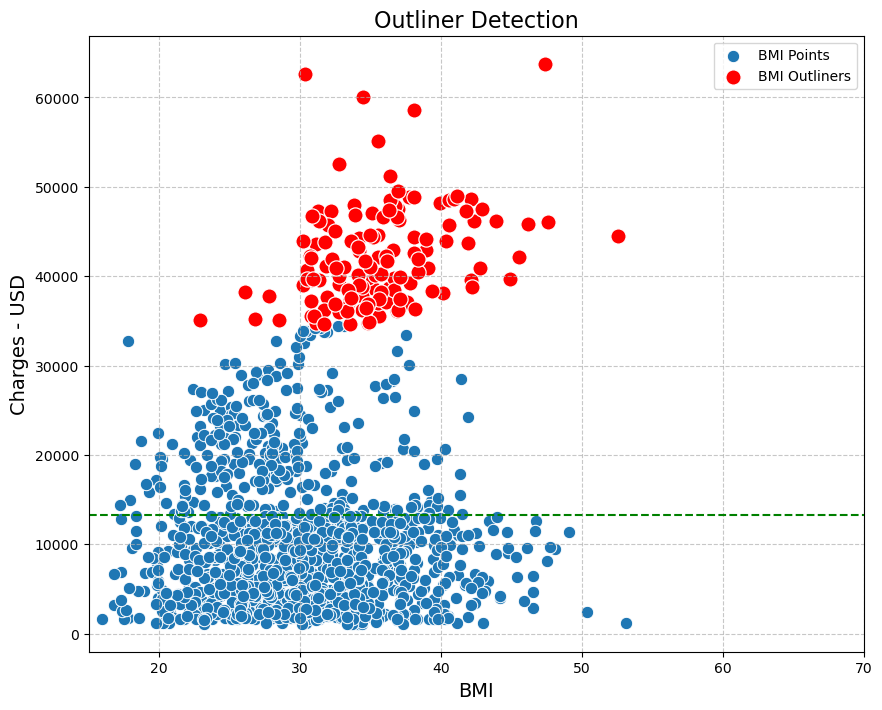

In [6]:
# Calculate IQR for column 'charges'
q1 = insurance['charges'].quantile(0.25)
q3 = insurance['charges'].quantile(0.75)
iqr = q3 - q1

# Calculating lower & upper bound outliners
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Indentify outliners 
outliner = insurance[(insurance['charges'] < lower_bound) | (insurance['charges'] > upper_bound)]

# Visualisation of data
plt.figure(figsize=(10, 8))
sns.scatterplot(x='bmi', y='charges', data=insurance, s=80, label='BMI Points')
sns.scatterplot(x='bmi', y='charges', data=outliner, s=120, color='red', label='BMI Outliners')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(15, 70)

# Identify overall mean 
overall_mean = insurance['charges'].mean()
plt.axhline(overall_mean, color='green', linestyle='--', label='Overall Mean')

# Labeling the plot
plt.title('Outliner Detection', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Charges - USD', fontsize=14)

# Saving the plot
plt.savefig('outliner_detection.png')
plt.show()
plt.close()